In [ ]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")
import torch
import time
import numpy as np
import defmod as dm
import defmod.multimodule_usefulfunctions as mm 
import matplotlib.pyplot as plt
import defmod.registrationdata as regdata
import defmod.hamiltonian_multishape as hamiltonian
from defmod.energyfunctional import EnergyFunctional_unconstrained, EnergyFunctional
from defmod import optimize
import defmod.save_results as results



torch.set_default_tensor_type(torch.DoubleTensor)

In [ ]:
data1 = regdata.Nut_translated(source_transvec=[0.,0.], target_transvec=[0.,0.], reflect_target=-1.)
data1()
data2 = regdata.Nut_translated(source_transvec=[1.,3.], target_transvec=[1.,3.], reflect_target=1.)
data2()
source = [*data1.source, *data2.source]
target = [*data1.target, *data2.target]
module_list = [*data1.modules, *data2.modules]
reduce_background = False

In [ ]:
plt.figure()
c = ['r', 'b']
for i in range(2):
    plt.figure()
    plt.plot(source[i].detach().numpy()[:,0], source[i].detach().numpy()[:,1], c=c[i])
    for j in range(5):
        plt.scatter(module_list[i][j].manifold.gd.view(-1,2).detach().numpy()[:,0],module_list[i][j].manifold.gd.view(-1,2).detach().numpy()[:,1], c=c[i])

    plt.plot(target[i].detach().numpy()[:,0], target[i].detach().numpy()[:,1], c=c[i])


    for gd in module_list[i].manifold.gd:
        plt.scatter(gd.view(-1,2).detach().numpy()[:,0],gd.view(-1,2).detach().numpy()[:,1], c='r')
    for gd in module_list[i].manifold.gd:
        plt.scatter(gd.view(-1,2).detach().numpy()[:,0],gd.view(-1,2).detach().numpy()[:,1], c='b')

plt.show()

<Figure size 432x288 with 0 Axes>

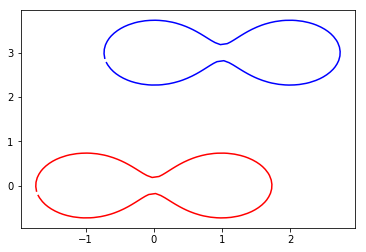

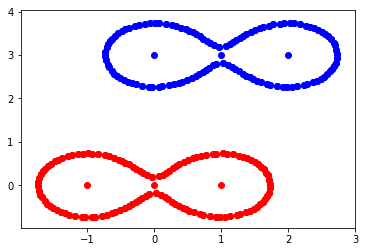

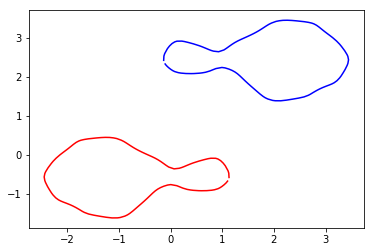

In [4]:
plt.figure()
c = ['r', 'b']

plt.figure()
for i in range(2):
    plt.plot(source[i].detach().numpy()[:,0], source[i].detach().numpy()[:,1], c=c[i])
    
plt.figure()
for i in range(2):
    for j in range(5):
        plt.scatter(module_list[i][j].manifold.gd.view(-1,2).detach().numpy()[:,0],module_list[i][j].manifold.gd.view(-1,2).detach().numpy()[:,1], c=c[i])

plt.figure()        
for i in range(2):
    plt.plot(target[i].detach().numpy()[:,0], target[i].detach().numpy()[:,1], c=c[i])

plt.show()

In [5]:
sigma_bg = 0.005
modules = dm.multishape.MultiShapeModule(module_list, sigma_bg)

constr = dm.constraints.Identity_Silent()
H = dm.hamiltonian_multishape.Hamiltonian_multi(modules, constr)
def attach(modules, target):
    return dm.attachement.VarifoldAttachement([1, 0.2])([modules.module_list[i][0].manifold.gd.view(-1,2) for i in range(2)], target)
E = EnergyFunctional_unconstrained(H.module, H, source, target, dim=2, gamma=1e-3, attach=attach)

In [ ]:
#sigma_bg = 0.0005
#j=0
#modules = dm.multishape.MultiShapeModule([module_list[j]], sigma_bg)

#constr = dm.constraints.Identity_Silent()
#H = dm.hamiltonian_multishape.Hamiltonian_multi(modules, constr)
#def attach(modules, target):
#    return dm.attachement.VarifoldAttachement([1, 0.2])([modules.module_list[j][0].manifold.gd.view(-1,2)], [target[j]])
#E = EnergyFunctional_unconstrained(H.module, H, source, target, dim=2, gamma=1e-3, attach=attach)

In [6]:
gd0_tensor = torch.cat(H.module.manifold.unroll_gd().copy(),0).requires_grad_().view(-1)
mom0_tensor = torch.cat(H.module.manifold.unroll_cotan().copy(),0).requires_grad_().view(-1)
    
    
gd0_tensor_init = gd0_tensor.clone()
gd0_tensor.retain_grad()
mom0_tensor.retain_grad()
X = [gd0_tensor, mom0_tensor]

from defmod import optimize
tic = time.time()
X[1], iter_states = optimize.BFGS(E, X, disp=True)(maxiter=5)
toc=time.time()

../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)
../defmod/multishape.py:208: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)


cost: 0.0 attach: 12.932866485633268
cost: 0.0 attach: 12.932866485633268
cost: 0.0013114369963740855 attach: 9.887036296012027
cost: 0.0013114369963740855 attach: 9.887036296012027
cost: 0.03278592490935218 attach: 3.8455810589452293
cost: 0.03278592490935218 attach: 3.8455810589452293
cost: 0.1469419409976633 attach: 3.173554572437399e+57
cost: 0.1469419409976633 attach: 3.173554572437399e+57
cost: 0.03278592490935218 attach: 3.8455810589452293
cost: 0.03278592490935218 attach: 3.8455810589452293
cost: 0.03278592490935218 attach: 3.8455810589452293
cost: 0.03278592490935218 attach: 3.8455810589452293


../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)
../defmod/multishape.py:208: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)


cost: 0.1469419409976633 attach: 3.173554572437399e+57
cost: 0.0795891823815398 attach: 10378958.734721825
cost: 0.06170481865259464 attach: 91.33083842935677
cost: 0.051050201361819404 attach: 5.926191395431102
cost: 0.04398160424308941 attach: 4.951514917398842
cost: 0.03552828320794819 attach: 4.041935354791078
cost: 0.033717367318672004 attach: 3.9056482876114034
cost: 0.03310036134453553 attach: 3.8650428021126153
cost: 0.03289367095160103 attach: 3.8521595173489107
cost: 0.03282292191771881 attach: 3.847808257674731
cost: 0.03279867364081796 attach: 3.846355432067404
cost: 0.03279030559613991 attach: 3.8458535090341632
         Current function value: 3.878367
         Iterations: 1
         Function evaluations: 18
         Gradient evaluations: 6


In [7]:
H.module.manifold.fill_gd(X[0])
H.module.manifold.fill_cotan(X[1])
H.geodesic_controls()

../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)
../defmod/multishape.py:208: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)


../defmod/deformationmodules.py:114: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  controls, _ =  torch.gesv(vs(self.manifold.gd.view(-1, self.manifold.dim)), K_q)
../defmod/multishape.py:208: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  lambda_qp,_ = torch.gesv(B, A)


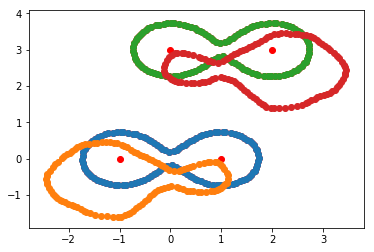

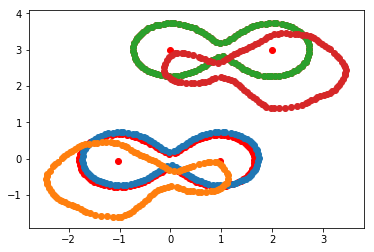

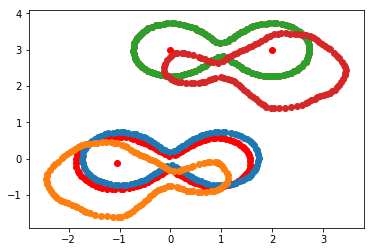

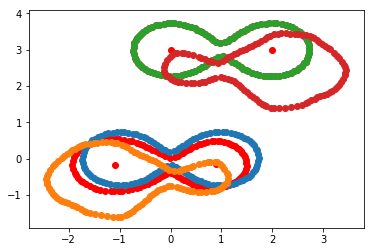

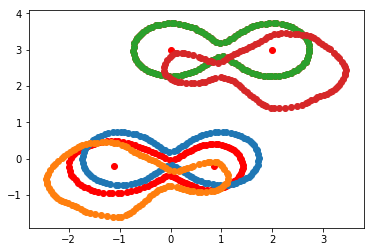

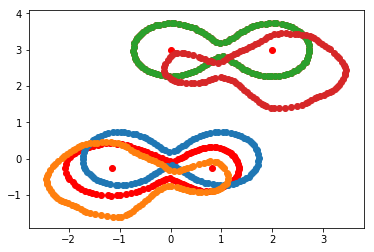

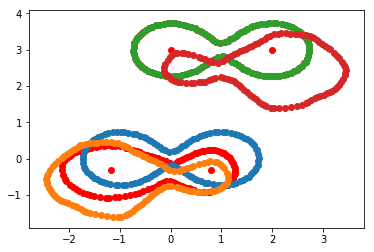

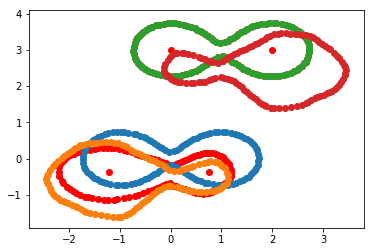

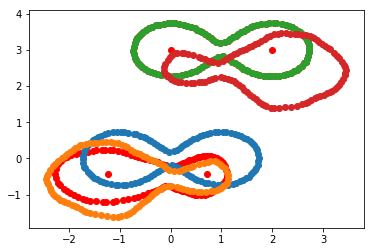

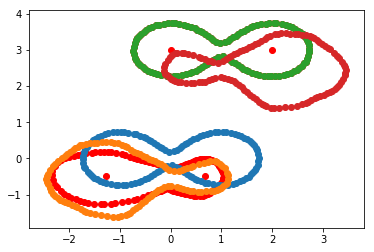

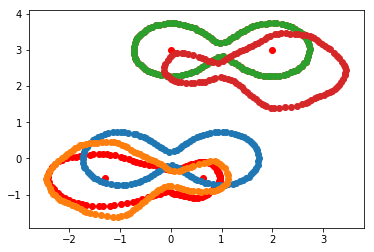

In [8]:

states, controls = dm.shooting.shoot_euler(H, it=10)


for s in states:
    plt.figure()
    for i in range(2):
        plt.scatter(s[i][0].gd.view(-1,2)[:, 0].detach().numpy(), s[i][0].gd.view(-1,2)[:, 1].detach().numpy(), c='r')
        plt.scatter(s[i][1].gd.view(-1,2)[:, 0].detach().numpy(), s[i][1].gd.view(-1,2)[:, 1].detach().numpy(), c='r')
        plt.scatter(s[i][2].gd.view(-1,2)[:, 0].detach().numpy(), s[i][2].gd.view(-1,2)[:, 1].detach().numpy(), c='r')
        plt.scatter(source[i][:,0].detach().numpy(), source[i][:,1].detach().numpy())
        plt.scatter(target[i][:,0].detach().numpy(), target[i][:,1].detach().numpy())
plt.show()

In [ ]:
H.module.manifold.fill_gd(X[0])
H.module.manifold.fill_cotan(X[1])
H.geodesic_controls()
save = results.Save_Results_MultiShape(H, source, target, E, iter_states=iter_states, time=toc-tic)

xlim = [-5, 10]
ylim = [-5,5]
d = [0.2, 0.2]
_ = save.gridpoints(xlim, ylim, d)

fig_states = save.fig_states(show=True)
fig_grid1, fig_grid2, fig_grid_bg, fig_multigrid = save.fig_grid(True)

save.save('../results/Nuts-Multi/MultiShapeDefmod/')
plt.close('all')

In [ ]:
constr_Id(H.module)

In [ ]:
## LDDMM Multishape Module
sigma1 = 2
manifold1 = dm.manifold.Landmarks(dim, nb_pts1, gd=source[0].view(-1))
trans1 = dm.deformationmodules.Translations(manifold1, sigma1)

mod1 = dm.deformationmodules.CompoundModule([silent1, trans1])

sigma2 = 2
manifold2 = dm.manifold.Landmarks(dim, nb_pts2, gd=source[1].view(-1))
trans2 = dm.deformationmodules.Translations(manifold2, sigma2)

mod2 = dm.deformationmodules.CompoundModule([silent2, trans2])

module_list = [mod1, mod2]
sigma_bg = 0.5
multi_LDDMM = dm.multishape.MultiShapeModule(module_list, sigma_bg)

constr = dm.constraints.Identity_Silent()
H_multi_LDDMM = dm.hamiltonian_multishape.Hamiltonian_multi(multi_LDDMM, constr)

In [ ]:
## LDDMM Module

man_compound = dm.manifold.Landmarks(2, len( torch.cat(source)), gd = torch.cat(source).view(-1))
module_LDDMM = dm.deformationmodules.CompoundModule([dm.deformationmodules.Translations(man_compound, sigma=0.5)])
H_LDDMM = dm.hamiltonian.Hamiltonian([module_LDDMM])

def attach(modules, target):
    return dm.attachement.VarifoldAttachement([1, 0.2])([modules.module_list[0].manifold.gd.view(-1,2)], target)

reg_param = 1e-3
Energy_LDDMM = EnergyFunctional_unconstrained(module_LDDMM, H_LDDMM, [torch.cat(source)], [torch.cat(target)], dim=2, gamma=reg_param, attach=attach)
gd0 = torch.cat(module_LDDMM.manifold.unroll_gd())
mom0 = torch.cat(module_LDDMM.manifold.unroll_cotan())
X_LDDMM = [gd0, mom0]

X_LDDMM[1] = dm.optimize.BFGS(Energy_LDDMM, X_LDDMM, disp=True)(maxiter=250)

In [ ]:
H_LDDMM.module.manifold.fill_gd(X_LDDMM[0])
H_LDDMM.module.manifold.fill_cotan(X_LDDMM[1])
H_LDDMM.geodesic_controls()
save = results.Save_Results_SingleShape(H_LDDMM, source, target)

xlim = [-5, 10]
ylim = [-5,5]
d = [0.2, 0.2]
_ = save.gridpoints(xlim, ylim, d)
#save.fig_grid(True)

In [ ]:
save.save('../results/circles_translation/LDDMM/')
plt.close('all')

In [ ]:
save.fig_states(True)

In [ ]:
def test_gradcheck_Hamiltonian():
    def hamiltonian(gd, mom):
        
        H.module.manifold.fill_gd(gd)
        H.module.manifold.fill_cotan(mom)
        H.geodesic_controls()
        return H()
    
    return torch.autograd.gradcheck(hamiltonian, (gd, mom), raise_exception=True)

gd = torch.cat(H.module.manifold.unroll_gd().copy()).requires_grad_().view(-1)
mom = torch.cat(H.module.manifold.unroll_cotan().copy()).requires_grad_().view(-1)


test_gradcheck_Hamiltonian()